In [1]:
from torch import nn

In [2]:
tr = nn.Transformer(
    d_model=512,
    num_encoder_layers=5,
    num_decoder_layers=5,
    nhead = 4
)

/opt/anaconda3/lib/python3.13/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [3]:
print(tr)

Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-4): 5 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
    (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): TransformerDecoder(
    (layers): ModuleList(
      (0-4): 5 x TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, o

In [29]:
# Requires: torch 2.6+, numpy 2.3.3
import torch
import torch.nn.functional as F

# Toy vocabulary and embeddings
tokens = ["orange", "is", "my", "favourite", "fruit"]
embed_dim = 4  # Small, illustrative dimension
torch.manual_seed(42)
embeddings = torch.randn(len(tokens), embed_dim)

# Simplest self-attention ("orange" attends to every word)
def simple_attention(Q, K, V):
    attn_scores = (Q @ K.T) / (K.shape[-1] ** 0.5)
    attn_weights = F.softmax(attn_scores, dim=-1)
    out = attn_weights @ V
    return attn_weights, out

Q = K = V = embeddings
attn_weights, attn_out = simple_attention(Q, K, V)

print("Attention weights for 'orange':")
for idx, token in enumerate(tokens):
    print(f"{token:10s}: {attn_weights[0, idx]:.3f}")

# Shows how much "orange" (the first word) pays attention to each token (including itself).


Attention weights for 'orange':
orange    : 0.990
is        : 0.001
my        : 0.002
favourite : 0.001
fruit     : 0.006


In [1]:
# Requires: scikit-learn 1.7.2, torch 2.6+, numpy 2.3.3
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate a toy "moons" dataset (nonlinear for illustration)
X, y = make_moons(n_samples=1000, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 1. Classical ML: Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(f"LogisticRegression test accuracy: {clf.score(X_test, y_test):.3f}")

LogisticRegression test accuracy: 0.875


In [2]:
import seaborn as sns

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


<Axes: >

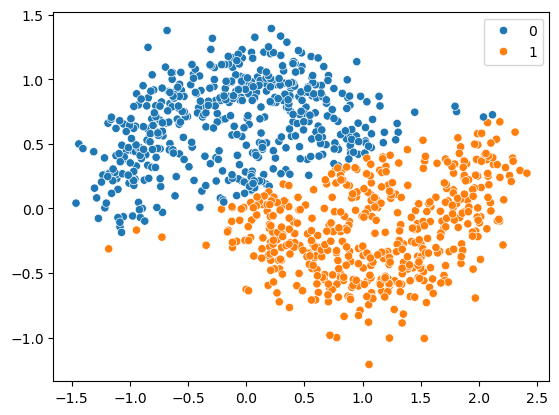

In [7]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clf.predict(X))

In [ ]:
import torch
import torch.nn as nn

# 2. Minimal Neural Net (PyTorch)
class TinyNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 16), nn.ReLU(),
            nn.Linear(16, 2)
        )
    def forward(self, x):
        return self.net(x)

In [26]:
torch.manual_seed(0)
model = TinyNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.long)

for epoch in range(160):
    optimizer.zero_grad()
    out = model(X_train_t)
    loss = loss_fn(out, y_train_t)
    loss.backward()
    optimizer.step()
print(f"NeuralNet test accuracy: {(model(X_test_t).argmax(1) == y_test_t).float().mean().item():.3f}")

# Both models predict classes, but the neural network can fit more complex, nonlinear boundaries.

LogisticRegression test accuracy: 0.865
NeuralNet test accuracy: 0.980


In [20]:
# 6. Tiny LSTM for remembering/forgetting (PyTorch)
import torch
import torch.nn as nn

In [8]:
seq = torch.tensor([[1.0, 2.0, 3.0]]).unsqueeze(-1)
seq

tensor([[[1.],
         [2.],
         [3.]]])

In [9]:
lstm = nn.LSTM(input_size=1, hidden_size=2, batch_first=True)
lstm

LSTM(1, 2, batch_first=True)

In [10]:
output, (h_n, c_n) = lstm(seq)

In [11]:
print("LSTM output:", output)

LSTM output: tensor([[[-0.0955,  0.0199],
         [-0.2072,  0.0041],
         [-0.3299, -0.0049]]], grad_fn=<TransposeBackward0>)


In [13]:
c_n

tensor([[[-0.5353, -0.0124]]], grad_fn=<StackBackward0>)

In [39]:
torch.rand((1,4)).unsqueeze(-1)

tensor([[[0.8399],
         [0.1374],
         [0.2331],
         [0.9578]]])

In [40]:
# 9. Toy transformer encoder & decoder block (PyTorch)
import torch
import torch.nn as nn

class MiniEncoderBlock(nn.Module):
    def __init__(self, d_model=8):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(d_model, num_heads=2, batch_first=True)
        self.ffn = nn.Sequential(nn.Linear(d_model, d_model), nn.ReLU(), nn.Linear(d_model, d_model))
    def forward(self, x):
        attn_out, _ = self.self_attn(x, x, x)
        return self.ffn(attn_out)

class MiniDecoderBlock(nn.Module):
    def __init__(self, d_model=8):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(d_model, 2, batch_first=True)
        self.cross_attn = nn.MultiheadAttention(d_model, 2, batch_first=True)
        self.ffn = nn.Sequential(nn.Linear(d_model, d_model), nn.ReLU(), nn.Linear(d_model, d_model))
    def forward(self, x, enc_out):
        x_attn, _ = self.self_attn(x, x, x)
        x_ca, _ = self.cross_attn(x_attn, enc_out, enc_out)
        return self.ffn(x_ca)

dummy = torch.rand(1, 4, 8)  # (batch, seq_len, d_model)
enc = MiniEncoderBlock()
dec = MiniDecoderBlock()
encoded = enc(dummy)
decoded = dec(dummy, encoded)
print("Encoder output:", encoded.shape, "Decoder output:", decoded.shape)


Encoder output: torch.Size([1, 4, 8]) Decoder output: torch.Size([1, 4, 8])


In [41]:
dummy

tensor([[[0.3313, 0.3227, 0.0162, 0.2137, 0.6249, 0.4340, 0.1371, 0.5117],
         [0.1585, 0.0758, 0.2247, 0.0624, 0.1816, 0.9998, 0.5944, 0.6541],
         [0.0337, 0.1716, 0.3336, 0.5782, 0.0600, 0.2846, 0.2007, 0.5014],
         [0.3139, 0.4654, 0.1612, 0.1568, 0.2083, 0.3289, 0.1054, 0.9192]]])

In [42]:
encoded

tensor([[[ 0.1018,  0.0570, -0.1755,  0.1498,  0.5294,  0.3102, -0.1815,
          -0.2464],
         [ 0.1016,  0.0569, -0.1756,  0.1499,  0.5294,  0.3102, -0.1816,
          -0.2464],
         [ 0.1017,  0.0569, -0.1756,  0.1499,  0.5293,  0.3102, -0.1815,
          -0.2464],
         [ 0.1014,  0.0567, -0.1758,  0.1500,  0.5293,  0.3099, -0.1816,
          -0.2464]]], grad_fn=<ViewBackward0>)

In [43]:
decoded

tensor([[[-0.1634, -0.3879,  0.2967, -0.0508, -0.1687,  0.0637, -0.1025,
           0.0875],
         [-0.1634, -0.3879,  0.2967, -0.0508, -0.1687,  0.0637, -0.1025,
           0.0875],
         [-0.1634, -0.3879,  0.2967, -0.0508, -0.1687,  0.0637, -0.1025,
           0.0875],
         [-0.1634, -0.3879,  0.2967, -0.0508, -0.1687,  0.0637, -0.1025,
           0.0875]]], grad_fn=<ViewBackward0>)

In [1]:
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import CharacterTextSplitter, RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
from langchain.chains import RetrievalQA
# from langchain.chains.retrieval import 
# from langchain_core.language_models.llms 

In [171]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
llm.invoke("What's the current date?")

AIMessage(content="I'm sorry, but I can't provide real-time information including today's date. You might want to check your device or calendar for the current date.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 12, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CIL8uK6ZD7rxuaEPrMPXATnSK7Zms', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c638c52d-9ac8-491b-8d02-fa3f813ba1f2-0', usage_metadata={'input_tokens': 12, 'output_tokens': 28, 'total_tokens': 40, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [177]:
import openai

# # Set your OpenAI API key
# # openai.api_key = "your-api-key"

# # Call the OpenAI chat completion API with a single prompt, no history
# response = openai.ChatCompletion.create(
#     model="gpt-4o-mini",  # you can use gpt-4, gpt-3.5-turbo, or other available model
#     messages=[
#         {"role": "user", "content": "Hello, how are you?"}
#     ]
# )

# # Print the assistant's reply
# print(response.choices[0].message.content)


from openai import OpenAI


def chat_with_openai(prompt: str = ""):

    prompt = prompt or "Hello, how are you?"
    # Create OpenAI client instance with your API key
    # client = OpenAI(api_key="your-api-key")
    client = OpenAI()
    
    # Single prompt without history
    response = client.chat.completions.create(
        model="gpt-4o-mini",  # or "gpt-3.5-turbo" etc.
        messages=[
            {"role": "user", "content": prompt}
        ]
    )
    
    # Print assistant response
    print(response.choices[0].message.content)

prompt = input('Say hello to openai! (Just press enter to say "Hello, how are you?") : ')
chat_with_openai(prompt)

Say hello to openai! (Just press enter to say "Hello, how are you?") :  What date did your training end?


My training data includes information up until October 2021. If you have questions or need information based on that timeframe, feel free to ask!


In [2]:
# 1. Load and chunk documents
loader = PyPDFLoader('data/iess403.pdf')
docs = loader.load()
splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = splitter.split_documents(docs)

In [13]:
len(chunks[1].page_content)

3325

In [ ]:
# 2. Create embeddings and vector store
embedder = OpenAIEmbeddings()
vector_store = Chroma.from_documents(chunks, embedder)

# 3. Expose retriever interface
retriever = vector_store.as_retriever()

# 4. Build RetrievalQA chain
llm = ChatOpenAI(model="gpt-4o")  # or "gpt-3.5-turbo", etc.
qa_chain = RetrievalQA.from_chain_type(llm=llm, retriever=retriever, return_source_documents=True)

# 5. Ask a question
while True:
    query = "Summarize the assembly election story from Haryana."
    query = input('Ask a question: ')
    answer = qa_chain.invoke({"query": query})
    print("Question:\n", answer['query'])
    print("Answer:\n", answer['result'])

In [178]:
# from langchain.prompts import 
# from langchain_core.chat_history import InMemoryChatMessageHistory

In [14]:
from sentence_transformers import SentenceTransformer
import chromadb

In [16]:
model = SentenceTransformer('all-MiniLM-L6-v2')
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [ ]:
documents = [
    "The cat sits on the mat.",
    "A dog is playing in the garden.",
    "The sun is bright today.",
    "I love reading books on science and technology.",
    "Artificial intelligence is transforming many industries."
]

# Generate embeddings for documents
embeddings = model.encode(documents)

In [17]:
documents = [
    "The cat sits on the mat.",
    "A dog is playing in the garden.",
    "The sun is bright today.",
    "I love reading books on science and technology.",
    "Artificial intelligence is transforming many industries."
]

# Generate embeddings for documents
embeddings = model.encode(documents)

embeddings

array([[ 0.13417713, -0.0329003 , -0.02480371, ...,  0.05106999,
         0.02030208,  0.06012187],
       [ 0.01731835, -0.07788233,  0.03794943, ...,  0.03329793,
         0.03157172,  0.00821149],
       [ 0.04563438,  0.11852303,  0.09161761, ..., -0.00939092,
        -0.06263206,  0.05781694],
       [-0.0097589 , -0.046904  ,  0.04088464, ..., -0.03019617,
        -0.00630172, -0.03024092],
       [ 0.05733141, -0.03839206,  0.05853872, ..., -0.07937905,
         0.0630242 , -0.02145816]], dtype=float32)

In [20]:
# len(embeddings)
len(embeddings[0])

5

In [39]:
# Initialize ChromaDB client
client = chromadb.Client()

# Create or get collection
# collection = client.create_collection(name="demo3_collection")
collection = client.get_collection('demo3_collection')


# Add documents and their embeddings to collection
# for i, (doc, emb) in enumerate(zip(documents, embeddings)):
#     collection.add(
#         documents=[doc],
#         embeddings=[emb.tolist()],
#         ids=[str(i)]
#     )

print(collection.count())

collection.upsert(documents=documents, 
                  embeddings=embeddings, 
                  ids = [str(i) for i in range(len(documents))]
                 )

print(collection.count())

0
5


In [ ]:
print(collection.count())

In [48]:

# Example query
query = "Tell me about AI and technology."
query = "Pets give me peace"
query = "I love playing with pets!"
query = "The kittens love playing with the yarn!"

# Generate query embedding
query_emb = model.encode([query])[0]
# query_emb.tolist()

In [50]:
# Perform similarity search to retrieve top 3 most similar documents
results = collection.query(
    query_embeddings=[query_emb.tolist()],
    n_results=3
)

print("Query:", query)
print("Top matches:")
for doc, score in zip(results['documents'][0], results['distances'][0]):
    print(f" - {doc} (Score: {score})")

Query: The kittens love playing with the yarn!
Top matches:
 - The cat sits on the mat. (Score: 1.299861192703247)
 - A dog is playing in the garden. (Score: 1.731477975845337)
 - I love reading books on science and technology. (Score: 1.7783089876174927)


Query: The kittens love playing with the yarn!
Top matches:
 - The cat sits on the mat. (Score: 1.299861192703247)
 - A dog is playing in the garden. (Score: 1.731477975845337)
 - I love reading books on science and technology. (Score: 1.7783089876174927)

In [153]:
# Requires: torch 2.6+, numpy 2.3.3
import torch
import torch.nn.functional as F
from sentence_transformers import SentenceTransformer

# Initialize embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')




# Toy vocabulary and embeddings
main_token = 'bank'
tokens = ["orange", "is", "my", "favourite", "fruit"]
tokens = 'orange colored oranges are the best fruits !'.split()
tokens = 'the river bank was robbed last night !'.split()
tokens = 'my bank account is flowing like a river'.split()
tokens = 'the river bank shifting was taken into account'.split()
embed_dim = 4  # Small, illustrative dimension
torch.manual_seed(38)
embeddings = torch.randn(len(tokens), embed_dim)

main_token_idx = tokens.index(main_token)

embeddings = torch.tensor(model.encode(" ".join(tokens), output_value='token_embeddings'))
embeddings.shape

/var/folders/s8/kjxth_ks4bl65mbw_b3_hhzc0000gn/T/ipykernel_45069/1480564706.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = torch.tensor(model.encode(" ".join(tokens), output_value='token_embeddings'))


torch.Size([10, 384])

In [154]:
# Simplest self-attention ("orange" attends to every word)
def simple_attention(Q, K, V):
    attn_scores = (Q @ K.T) / (K.shape[-1] ** 0.5)
    attn_weights = F.softmax(attn_scores, dim=-1)
    out = attn_weights @ V
    return attn_weights, out

Q = K = V = embeddings[1:-1]
attn_weights, attn_out = simple_attention(Q, K, V)

print("Attention weights for 'orange':")
for idx, token in enumerate(tokens):
    print(f"{token:10s}: {attn_weights[main_token_idx, idx]:.3f}")

# Shows how much "orange" (the first word) pays attention to each token (including itself).


Attention weights for 'orange':
the       : 0.014
river     : 0.056
bank      : 0.907
shifting  : 0.002
was       : 0.012
taken     : 0.002
into      : 0.005
account   : 0.003


In [97]:
attn_out

tensor([[-1.0818,  1.2523,  1.9504, -0.3056],
        [-0.2353, -0.2224,  0.6912, -0.1309],
        [ 1.3151, -0.2859, -0.1444,  0.9183],
        [-0.2143,  0.3479,  0.7128,  0.4301],
        [-0.4298,  0.4444,  1.1141, -0.0511]])

In [186]:
from random import choice, random
from time import sleep


def get_random_key():
    '''Returns randomized key, with randomized jitter delay added
    This is to distribute load across keys and avoid throttling 
    of the same key at the same time for multiple concurrent calls'''
    keys = [1,2,3,4,5]
    sleep(random())
    return choice(keys)

get_random_key()

5

In [1]:
import json

In [2]:
json.load(open('Ecosystem.ipynb'))

JSONDecodeError: Invalid control character at: line 112 column 46 (char 4524)